Questions for Marcum
- How is Cape and Lehman actually applied? It depends on known conductivity k

In [500]:
from __future__ import division
# Evan Peters 2017
# Models for thermal diffusivity calculations in the laser flash method
import numpy as np
np.set_printoptions(precision=8)

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize

In [640]:
# Define relevant parameters/funcs for this run

Q =  400# pulse energy per area [J/cm^2]
L = .1 # sample thickness [cm]
R = 2 # sample radius [m]

#FIXME: Cape/Lehman's model is highly dependent on k ... how do you even apply this
k = 1 # conductivity [W/(cm*K)]
rho = 8 # sample density [g/cm^3]
c_p = .4 # sample specific heat [J/(g*K)]
alpha = k/(rho*c_p) # sample diffusivity [units??]


sigma = 5.67E-12 # Stefan-Boltzman constant [W/(cm^2*K^4)]
eps_z = .8 # emissivity, axial
eps_r = .8 # emissivity, radial
u0 = 293 # Initial sample temperature [K]
u0 = 1000
u0 = 0
print "ping"

print "alpha=", alpha

ping
alpha= 0.3125


In [634]:
#Parker (1961)
def Parker_u(t, N):
    """
    Compute the analytical solution for a known diffusivity
    Finds the temperature at z = L
    Params:
        t - array representing full time 
        N - terms to carry in Parker's summation
    """
    sum = 0
    for i in range(N):
        n = i + 1 # Account for index from zero
        term = (-1)**n*np.exp(-n**2*np.pi**2*alpha*t/L**2)
        sum += term
    
    out = (1 + 2*sum)*Q/(rho*c_p*L)
    out[0] = 0     #FIXME: zeroth term buggy based on N...
    return out + u0





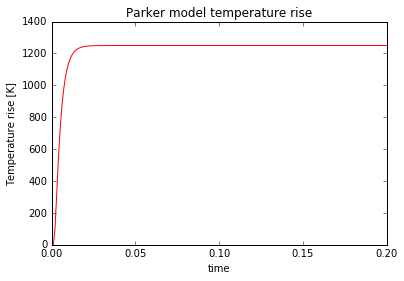

In [635]:
# Compute and plot Parker temperature
time = np.linspace(0,.2,200)
u = Parker_u(time, 20)


#print u #DEBUG
plt.figure()
plt.plot(time, u, 'r')
plt.xlabel("time")
plt.ylabel("Temperature rise [K]")
plt.title("Parker model temperature rise")
plt.show()


In [636]:
# General functions for use in many models
def N_root_values(N, func, int_func):
    # Given a function func, find its roots on the intervals 
    # guessed by int_func. Return a list of N-many roots
    out = []
    for m in range(N):
        a, b = int_func(m)
        # DEGUG
        print "(%5.2f, %5.2f): f(a)=%7.6f, f(b) = %7.6f" %(a,b,func(a),func(b))
        
        root = scipy.optimize.brentq(func,a,b)
        out.append(root)
        
    
    return out

Y_r=0.000000000, Y_z = 0.000000000


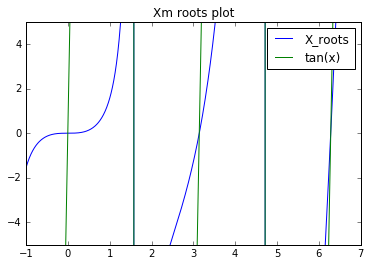

(-0.30,  0.30): f(a)=-0.027840, f(b) = 0.027840
( 2.84,  3.44): f(a)=-2.497782, f(b) = 3.663952
( 5.98,  6.58): f(a)=-11.073776, f(b) = 13.406116
( 9.12,  9.72): f(a)=-25.755823, f(b) = 29.254333
(12.27, 12.87): f(a)=-46.543922, f(b) = 51.208603
(15.41, 16.01): f(a)=-73.438075, f(b) = 79.268926
(18.55, 19.15): f(a)=-106.438280, f(b) = 113.435302
(21.69, 22.29): f(a)=-145.544539, f(b) = 153.707730
(24.83, 25.43): f(a)=-190.756850, f(b) = 200.086211
(27.97, 28.57): f(a)=-242.075214, f(b) = 252.570745
Value of Xm: 0.0
Xm Approximation 0.0
Check Xm;  0.00 =  0.00
Value of Xm: 3.14159265359
Xm Approximation 3.14159265359
Check Xm;  0.00 =  0.00
Value of Xm: 6.28318530718
Xm Approximation 6.28318530718
Check Xm; -0.00 =  0.00
Value of Xm: 9.42477796077
Xm Approximation 9.42477796077
Check Xm; -0.00 =  0.00
Value of Xm: 12.5663706144
Xm Approximation 12.5663706144
Check Xm; -0.00 =  0.00
Value of Xm: 15.7079632679
Xm Approximation 15.7079632679
Check Xm; -0.00 =  0.00
Value of Xm: 18.84955592

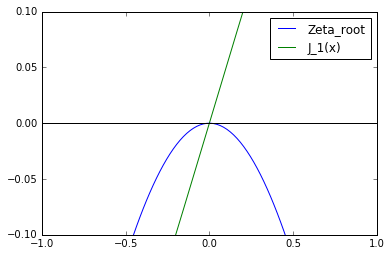

( 2.00, -0.00): f(a)=-1.153450, f(b) = -0.000000


ValueError: f(a) and f(b) must have different signs

In [637]:
# Cape and Lehman model

# Preliminary analytical tasks

# 1 Y_r,z are constant throughout the problem
Y_r = 4*sigma*eps_r*u0**3*r0/k
Y_z = 4*sigma*eps_z*u0**3*L/k

print "Y_r=%8.9f, Y_z = %8.9f" % (Y_r, Y_z)

# 2 Rootfinding is necessary to determine X_m and Zeta_i
from scipy.special import jv
from scipy.special import jn_zeros
def X_root(x):
    return np.tan(x)*(x**2-Y_z**2)-2*x*Y_z
def X_root_guesses(m):
    #Guess at the location (Xm is about m*pi) (warning: m*pi/2 is a false root.)
    a = m*np.pi - .3
    b = m*np.pi + .3
    return (a,b)

def Zeta_root(x):
    return Y_r*jv(0,x)-x*jv(1,x)
def Zeta_root_guesses(m):
    # mth root is about equal to mth root of J_1(x)
    J1_roots = jn_zeros(1,m+1)
    if m == 0:
        a = 2
        b = -.001
    else:
        a = J1_roots[m] - .3
        b = J1_roots[m] + .3    
    return (a,b)

# #TODO: rewrite 
# N_root_values(N, X_root, X_root_guesses)
# def N_Xm_values(N):
#     # return a list of N-many roots of f 
#     out = []
#     for m in range(N):
#         #Guess at the location (Xm is about m*pi) (warning: m*pi/2 is a false root.)
#         root = scipy.optimize.brentq(X_root,a,b)
#         out.append(root)
#         #DEBUG
#       #  print "X root in range (%5.2f,%5.2f): %5.2f" %(a,b,root)
#     return out

#Discrepancy: I cannot reproduce eqn 23's approximation for X0 at the high temperature lim
# The trivial solution should be X0 = 0...
def N_Xm_approx_values(N):
    # returna a list of N-many approximate Xm values
    out = []
    for m in range(N):
        if m == 0:
            xm = (2*Y_z)**2*(1-Y_z/12+7*Y_z**2/288)
        else:
            xm = m*np.pi + 2*Y_z/(m*np.pi) - 4*Y_z**2/(m*np.pi)**2 - 2*Y_z**3/(3*(m*np.pi)**3)
        out.append(xm)
    return out



# def N_Zetai_values(N):
#     #return a list of N-many roots of f
#     out = []
    
#     for m in range(N):
#         #Guess at the location (hint: )
        
 
#         try:
#             root = scipy.optimize.brentq(Zeta_root,a,b)
#         except ValueError as e:
#             print "Root-finding error for Zeta_i: Root range approximations were invalid"
#             print str(e)
#             print "Setting this root to 0"
#             root = 0.0
#         out.append(root)
        
#     # Zeta=0 is a solution ONLY if Y_r = 0   

        
#     return out   



#TODO:
def plot_Xm_roots():
    #Plot the discovered roots, for double checking
    x = np.linspace(-1,7,1000)
                    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, X_root(x), x, 100*np.tan(x))
    plt.legend(["X_roots", "tan(x)"])
    #ax.set_xlim([-2,5])
    ax.set_ylim([-5, 5])
    ax.set_title("Xm roots plot")
    return ax

#TODO
def plot_Zetai_roots():
    #Plot the discovered roots, for double checking
    x = np.linspace(-5,15,1000)
                    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, Zeta_root(x),x,jv(1,x))
    plt.legend(["Zeta_root", "J_1(x)"])
    ax.axhline(y=0,color="Black")

    ax.set_ylim([-.1, .1])
    ax.set_xlim([-1,1])
    return ax 

M = 10
I = 5

plt.show(plot_Xm_roots())
X = N_root_values(M, X_root, X_root_guesses)
X_approx = N_Xm_approx_values(M)

for m in range(M):
    print "Value of Xm:", X[m]
    print "Xm Approximation", X_approx[m]
    print "Check Xm; %5.2f = %5.2f" % ( (X[m]**2-Y_z**2)*np.tan(X[m]), 2*X[m]*Y_z )

plt.show(plot_Zetai_roots())

# Solve for Zeta roots
Zeta = N_root_values(I, Zeta_root, Zeta_root_guesses)    
if Y_r == 0:
    Zeta[0] = 0


print "Y_r=", Y_r, "u0=",u0
for i in range(I):

    print "Value of Zeta_i:", Zeta[i]
    print "Check Z_i; %5.8f = %5.8f" % ( Y_r*jv(0,Zeta[i]), Zeta[i]*jv(1,Zeta[i]))
    



In [ ]:
# (3) Series coefficients

#FIXME: D_i and D_0 are currently the issue; need to fix D_i>0 = 0...

# # # # # # # 
#TODO  Verify with WAtt, 1966?



def D(i,r):
    #Use the limits from eqn (23) to show a->1
    #FIXME: This is exploding for Zeta_0 = 0, a-> 1/~0 = infty
    try:
        a = 2*Y_r**2/(Y_r**2 + Zeta[i]**2)
    except ZeroDivisionError:
        a = 1
    b = jv(0, Zeta[i]*r/R)/jv(0,Zeta[i])**2
    # b->1 at the center, etc.
    print "i=%i, Z_i=%6.5f, a=%4.2f, b=%4.2f" %(i, Zeta[i], a, b)
    
    return a*b

#Check D_i decay with i, Y_r < 1
ivals = range(4)
plt.plot( ivals,[D(i, 0) for i in ivals])
plt.title("D(i,0)")
plt.xlabel("i")

def Cm_Xm(m):
    #This is defined to avoid ZeroDivisionError on limiting case Y->0
    a = (2*alpha*(-1)**m)/L
    try:
        b = X[m]**2/(X[m]**2 + 2*Y_z + Y_z**2)
    #use limits for C0X0->alpha/L
    except ZeroDivisionError:
        b = .5
    return a*b

def Cm_Xm_approx(m):
    # Using Xm from eqn 23, for high temperatures
    a = (2*alpha*(-1)**m)/L
    X_approx = N_Xm_approx_values(m+1)
    try:
        b = X_approx[m]**2/(X_approx[m]**2 + 2*Y_z + Y_z**2)
    #use limits for C0X0->alpha/L
    except ZeroDivisionError:
        b = .5
    return a*b  
 
def omega(i,m):
    return ((X[m]/L)**2 + (Zeta[i]/R)**2)

for m in range(10):
    print "exact C(%i)X(%i) = %6.5f" % (m,m, Cm_Xm(m))
    print "approx C(%i)X(%i) = %6.5f" % (m,m, Cm_Xm_approx(m))


In [ ]:
# (4) putting it all together

def CapeLehman_u(M, I, r,t):
    #Summing from m=0:M-1 and i=0:I-1, return the Cape/Lehman
    # T-distribtion for input vectors of radial position (r)
    # and time (t)
    outer_sum = 0
    for m in range(M):
        I_sum = 0
        for i in range(I):
#             print "m=%i, i=%i" % (m,i)
#             print "Cm_Xm=",Cm_Xm(m)
#             print "D_i=", D(i,r)
            I_sum += D(i,r)*np.exp(-omega(i,m)*alpha*t)
        outer_sum += Cm_Xm(m)*I_sum
        
    return Q*outer_sum/k + u0

def CL_approx(M,I,r,t):
    #eqn 24 for high temperatures
    
    Y = Y_z + (L/R)**2*Y_r
    #Y = Y_z
    
    D0 = D(0,r)
    print "D_0 *q/k", Q/k*D0
    a = Cm_Xm_approx(0)*np.exp(-2*alpha*t*Y/L**2)*Q/k*D0
    print "a exp", np.exp(-2*alpha*t*Y/L**2)[:20]
    print "CmXm", Cm_Xm_approx(0)
    b = np.exp(2*Y_r*alpha*t/R**2)*Q/k*D0
    print "b exp", np.exp(2*Y_r*alpha*t/R**2)[:20]
   
    summ = 0
    for m in range(1,M):
        c = Cm_Xm_approx(m)*np.exp(-(np.pi/L)**2*(m**2+4*Y/np.pi**2)*alpha*t)
        summ += c
        #print c[:100], "\n\n"
        
    print "b",b[:100]
    print "bc", summ[:100]*b[:100]
    # 3: Cannot verify that b*summ << C0*X0 like the paper says...
    
    print "a", a[:100]
    return u0 + (a+b*summ)
    
#So far this is buggy. Attempts at solution:
# 1: only positive roots for Xm, Zi - This inverts the problem. The
# largest term in the addition is the m=1 term that jumps away from u0
# 2: C0*X0 = alpha/l! numpy cannot recovr the symbolic solution..
#      FIXME: There's something very fisshy about XmC(m) for Yr->0 vs Yr = 0:
#      the limit should probably be equal to the proper analytical soltn
# 3: I believe the current problem is that for u0 >0, C0_X0 jumps down to ~0 (instead of alpha/a)
# 4: perhaps more of a problem, for u0 -> 0, "b*c" -> infty
#TESTING!!

T_lim = Q/(rho*c_p*L)
t_c = (L/np.pi)**2/alpha
print "Limiting temperature:", T_lim
print "time constant", t_c
print "Y_z=%5.3f" % Y_z
print "Y_r=%5.3f" % Y_r

time = np.linspace(0,10,10000)
T = CapeLehman_u(10,5,0,time)
T_approx = CL_approx(10,5,0,time)


fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax.plot(time, T_approx, color="black")
ax2.plot(time, Parker_u(time,20), color="red")
#plt.legend(["CL, approx", "Parker"])
#ax.set_ylim([u0-T_lim,ax.get_ylim()[1]])
#ax.set_ylim([0,35])

# ax.set_xlabel("Time (s)")
# ax.set_ylabel("Temperature (K)")

# ax2 = fig.add_subplot(122)
# ax2.plot(time, T, time, Parker_u(time,20))
# plt.legend(["Cape & Lehman", "Parker"])
# #ax2.set_ylim(ax.get_ylim()) # shared axes
# ax2.set_xlabel("Time (s)")
# ax2.set_ylabel("Temperature (K)")

plt.show()




a= 0.0 b= 0.0 r= 1


/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in true_divide
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in true_divide


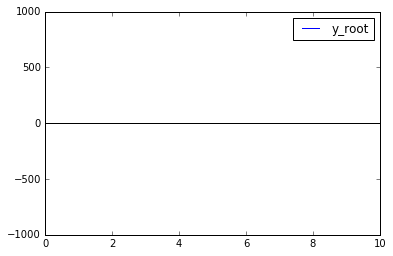

[0.0, 3.141592653589793, 6.283185307179586, 9.42477796076938, 12.566370614359172, 15.707963267948966, 18.84955592153876, 21.991148575128552, 25.132741228718345, 28.274333882308138, 31.41592653589793, 34.55751918948772, 37.69911184307752, 40.840704496667314, 43.982297150257104, 47.12388980384689, 50.26548245743669, 53.40707511102649, 56.548667764616276, 59.690260418206066]


In [650]:
# Cowan(1962)

# Preliminary analytical tasks: Root finding, setting values

# FIXME: rad. BC's aren't dependent on separate face radiation values ye
c0 = 4*sigma*eps_z*u0**3
cL = 4*sigma*eps_z*u0**3
# Note: cL refers to the _front_ face, c0 is the _rear_ face 


a = L*(c0+cL)
b = c0*cL*L**2
try:
    r = cL/c0
except ZeroDivisionError:
    #FIXME should converge to ratio of eps_z (front/back)
    r = 1

print "a=", a, "b=", b, "r=", r
    
NN = 20

def cot(x):
    try:
        out = 1/np.tan(x)
    except ZeroDivisionError:
        out = np.nan
    return out

def y_root(x):
    
    #Pass over yn = 0, as it should not be a root
    try:
        k = 1/x
    except ZeroDivisionError:
        return 0
    
    else:
        return cot(x) + b/(a*x) - x/a
def y_root_guesses(m):
    #FIXME: Very high sensitivity to guessed range at large m...
    # Currently works up to 20
    # A function that guesses the interval where the mth root of y_root lies
    return (m*np.pi+.00001, (m+1)*np.pi-.00001)

#TODO
def plot_y_roots():
    #Plot the discovered roots, for double checking
    x = np.linspace(0,1,10000)
                    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_root(x))
    plt.legend(["y_root"])
    ax.axhline(y=0,color="Black")

    ax.set_ylim([-1000, 1000])
    ax.set_xlim([0,10])
    return ax 

def N_y_root_values(N, a):
    
    if a == 0:
        return [n*np.pi for n in range(N)]
    else:
        return N_root_values(NN, y_root, y_root_guesses)
    
y_roots = plot_y_roots()
plt.show()

y_vals = N_y_root_values(NN, a)
print y_vals

In [654]:
# (3) Series coefficients

def D_n(n, a, b, y_lst):
    """
    Caluclate D_n from Cowan's paper. Current limits supported:
    TODO: a-> 0 (c0=cL=0)
    others??
    """
    # non-radiative case
    if a == 0:
        if n == 0:
            return 0
        else:
            return (n**2)*(np.pi**2)*(-1)**n
    
    yn = y_lst[n]
    
    BB = (1 + a - (2*b)/a + yn**2/a +b/yn**2 + b**2/(a*yn**2))
    return yn*np.sin(yn)*BB

D_vals = [D_n(n, a, b, y_vals) for n in range(NN)]
print D_vals


[0, -9.869604401089358, 39.47841760435743, -88.82643960980423, 157.91367041742973, -246.74011002723395, 355.3057584392169, -483.61061565337855, 631.6546816697189, -799.437956488238, 986.9604401089358, -1194.2221325318123, 1421.2230337568676, -1667.9631437841015, 1934.4424626135142, -2220.6609902451055, 2526.6187266788756, -2852.3156719148246, 3197.751825952952, -3562.927188793258]


In [659]:
# (4) putting it together!

    
#TODO: Fix up zero-temperature convergence...

def Cowan_u(N, z, t, T_inf, a, b, yvals):
    # Compute the full Cowan temperature for a given set of params
    # Compute up to N values over an array of times 't'
    
    summ = 0
    for n in range(N):
        yn = yvals[n]
        A = np.cos(yn*(L-z)/L) # cosine term
        if a == 0:
            # apply yn-> sqrt(a) as a-> zero
            B = 0 #sine term
        else:
            B = a*np.sin(yn*(L-z)/L)/(yn*(1+r))
            
        top = yn**2*( A + B )*np.exp(-alpha*yn**2*t/L**2)
        bot = D_n(n,a,b,yvals)
        
        summ += top/bot
        
        #DEBUG
        print "top", top[:20]
        print "bot=Dn", bot
        print "exp", np.exp(-alpha*yn**2*t/L**2)[:20]
        print "\n"
    
    return u0 + 2*T_inf*summ
    
    
    

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


top [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
bot=Dn 0
exp [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


top [ 9.8696044   7.25001682  5.32571942  3.91216849  2.87380185  2.11103818
  1.55072703  1.1391335   0.83678501  0.61468578  0.45153605  0.33168948
  0.24365255  0.17898236  0.13147692  0.09658035  0.07094602  0.05211555
  0.03828305  0.02812198]
bot=Dn -9.86960440109
exp [ 1.          0.73458029  0.5396082   0.39638554  0.291177    0.21389289
  0.1571215   0.11541836  0.08478405  0.06228069  0.04575017  0.03360717
  0.02468717  0.0181347   0.0133214   0.00978564  0.00718833  0.00528041
  0.00387888  0.00284935]


top [  3.94784176e+01   1.14952074e+01   3.34714006e+00   9.74610218e-01
   2.83784084e-01   8.26313996e-02   2.40603635e-02   7.00582457e-03
   2.03993501e-03   5.93982168e-04   1.72953949e-04   5.03602127e-05
   1.46637359e-05   4.26974270e-06   1.24325089e-06   3.62006071e-07
   1.05407843

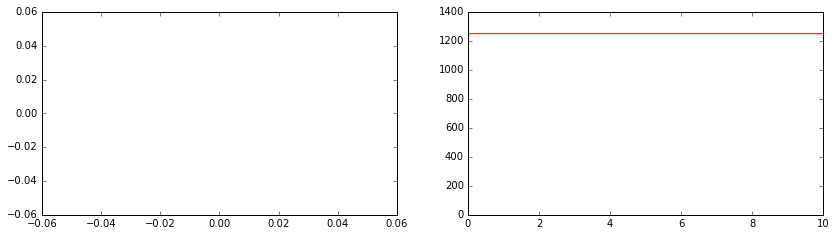

In [660]:
T_lim = Q/(rho*c_p*L)
time = np.linspace(0,10,10000)
T_Cowan = Cowan_u(NN, L, time, T_lim, a, b, y_vals)

print "a=", a, " b=", b


fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax.plot(time, T_Cowan, color="black")
ax2.plot(time, Parker_u(time,20), color="red")

 ** This cell left intentionally blank **

x






























